In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [18]:
mean_1=[0,0]
cov_1=[[1,0],[0,1]]
dist_1=np.random.multivariate_normal(mean_1,cov_1,100)

mean_2=[2,2]
cov_2=[[1,0],[0,1]]
dist_2=np.random.multivariate_normal(mean_2,cov_2,100)

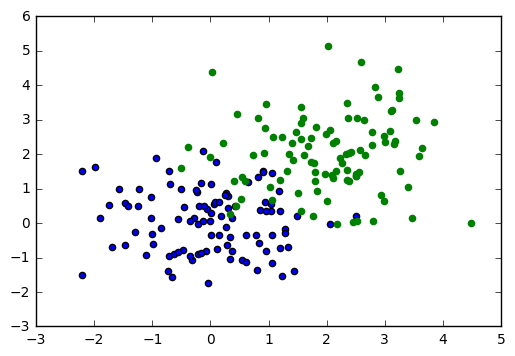

In [20]:
plt.scatter(dist_1[:,0],dist_1[:,1])
plt.scatter(dist_2[:,0],dist_2[:,1],color='green')
plt.show()

In [28]:
data=np.zeros((dist_1.shape[0]*2,dist_1.shape[1]))       
data[:dist_1.shape[0],:]=dist_1
data[dist_1.shape[0]:,:]=dist_2
print data.shape              

(200, 2)


In [41]:
labels=np.zeros((dist_1.shape[0]*2,))


In [42]:
labels[dist_1.shape[0]:]=1

In [50]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
print dist(np.array([0,0]),np.array([1,1]))

1.41421356237


In [68]:
def knn(X_train,y_train,X_test,k=5):
    y_test=[]
    for ix in range(X_test.shape[0]):
        distance=[]
        for iy in range(X_train.shape[0]):
            distance.append((dist(X_test[ix],X_train[iy]),y_train[iy]))
        distance.sort()
        distance=distance[:k]
        # print distance
        freq={}
        for ic in range(k):
            try:
                freq[distance[ic][1]]+=1
            except:
                freq[distance[ic][1]]=1
        if (freq[0]>freq[1]):
            y_test.append(0)
        else:
            y_test.append(1)
        return y_test    
    

In [69]:
x_test=np.array([[0,2]])
knn(data,labels,x_test)

[(0.069148352130130653, 1.0), (0.15717466680899306, 0.0), (0.24792460475392911, 0.0), (0.39474176855439069, 1.0), (0.43989622727173561, 1.0)]


[1]

In [92]:
# MNIST data set 
def knn_mnist(X_train,y_train,X_test,k=5):
    n_train=X_train.shape[0]
    n_test=X_test.shape[0]
    val=[]
    for ix in range(n_test):
        distance=[]
        for iy in range(n_train):
            distance.append([dist(X_train[iy],X_test[ix]),y_train[iy]])
        distance.sort()
        distance=np.array(distance[:k])
        unique,neighbours=np.unique(distance[:,1],return_counts=True)
        ans=dict(zip(unique,neighbours))
        
        
            

In [93]:
knn_mnist(data,labels,x_test)


{0.0: 2, 1.0: 3}

In [101]:
a={0:2,2:1,1:3}
sorted(a.keys,key=lambda x:x[])

SyntaxError: invalid syntax (<ipython-input-101-e3a3b0be4a7c>, line 2)

<type 'numpy.ndarray'>
